In [151]:
import pandas as pd
dataset = pd.read_csv("car_data.csv")
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [152]:
dataset.shape

(301, 9)

In [153]:
print(dataset["Seller_Type"].unique())
print(dataset["Transmission"].unique())
print(dataset["Owner"].unique())
print(dataset["Fuel_Type"].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [154]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [155]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [156]:
final_dataset = dataset[["Year","Selling_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]]

In [157]:
final_dataset["current_year"]=2023

C:\Users\Garvit Batra\AppData\Local\Temp\ipykernel_22700\1155417892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset["current_year"]=2023


In [158]:
final_dataset["no_of_years"] = final_dataset["current_year"] - final_dataset["Year"]

In [159]:
final_dataset.head()

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,2014,3.35,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,42450,Diesel,Dealer,Manual,0,2023,9


In [160]:
final_dataset.drop(["current_year"],axis=1,inplace=True)

In [161]:
final_dataset.drop(["Year"],axis=1,inplace=True)

In [162]:
final_dataset.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,27000,Petrol,Dealer,Manual,0,9
1,4.75,43000,Diesel,Dealer,Manual,0,10
2,7.25,6900,Petrol,Dealer,Manual,0,6
3,2.85,5200,Petrol,Dealer,Manual,0,12
4,4.60,42450,Diesel,Dealer,Manual,0,9


In [163]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [164]:
final_dataset

,Selling_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,27000,0,9,0,1,0,1
1,4.75,43000,0,10,1,0,0,1
2,7.25,6900,0,6,0,1,0,1
3,2.85,5200,0,12,0,1,0,1
4,4.60,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,9.50,33988,0,7,1,0,0,1
297,4.00,60000,0,8,0,1,0,1
298,3.35,87934,0,14,0,1,0,1
299,11.50,9000,0,6,1,0,0,1


In [165]:
final_dataset.corr()

,Selling_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Kms_Driven,0.029187,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

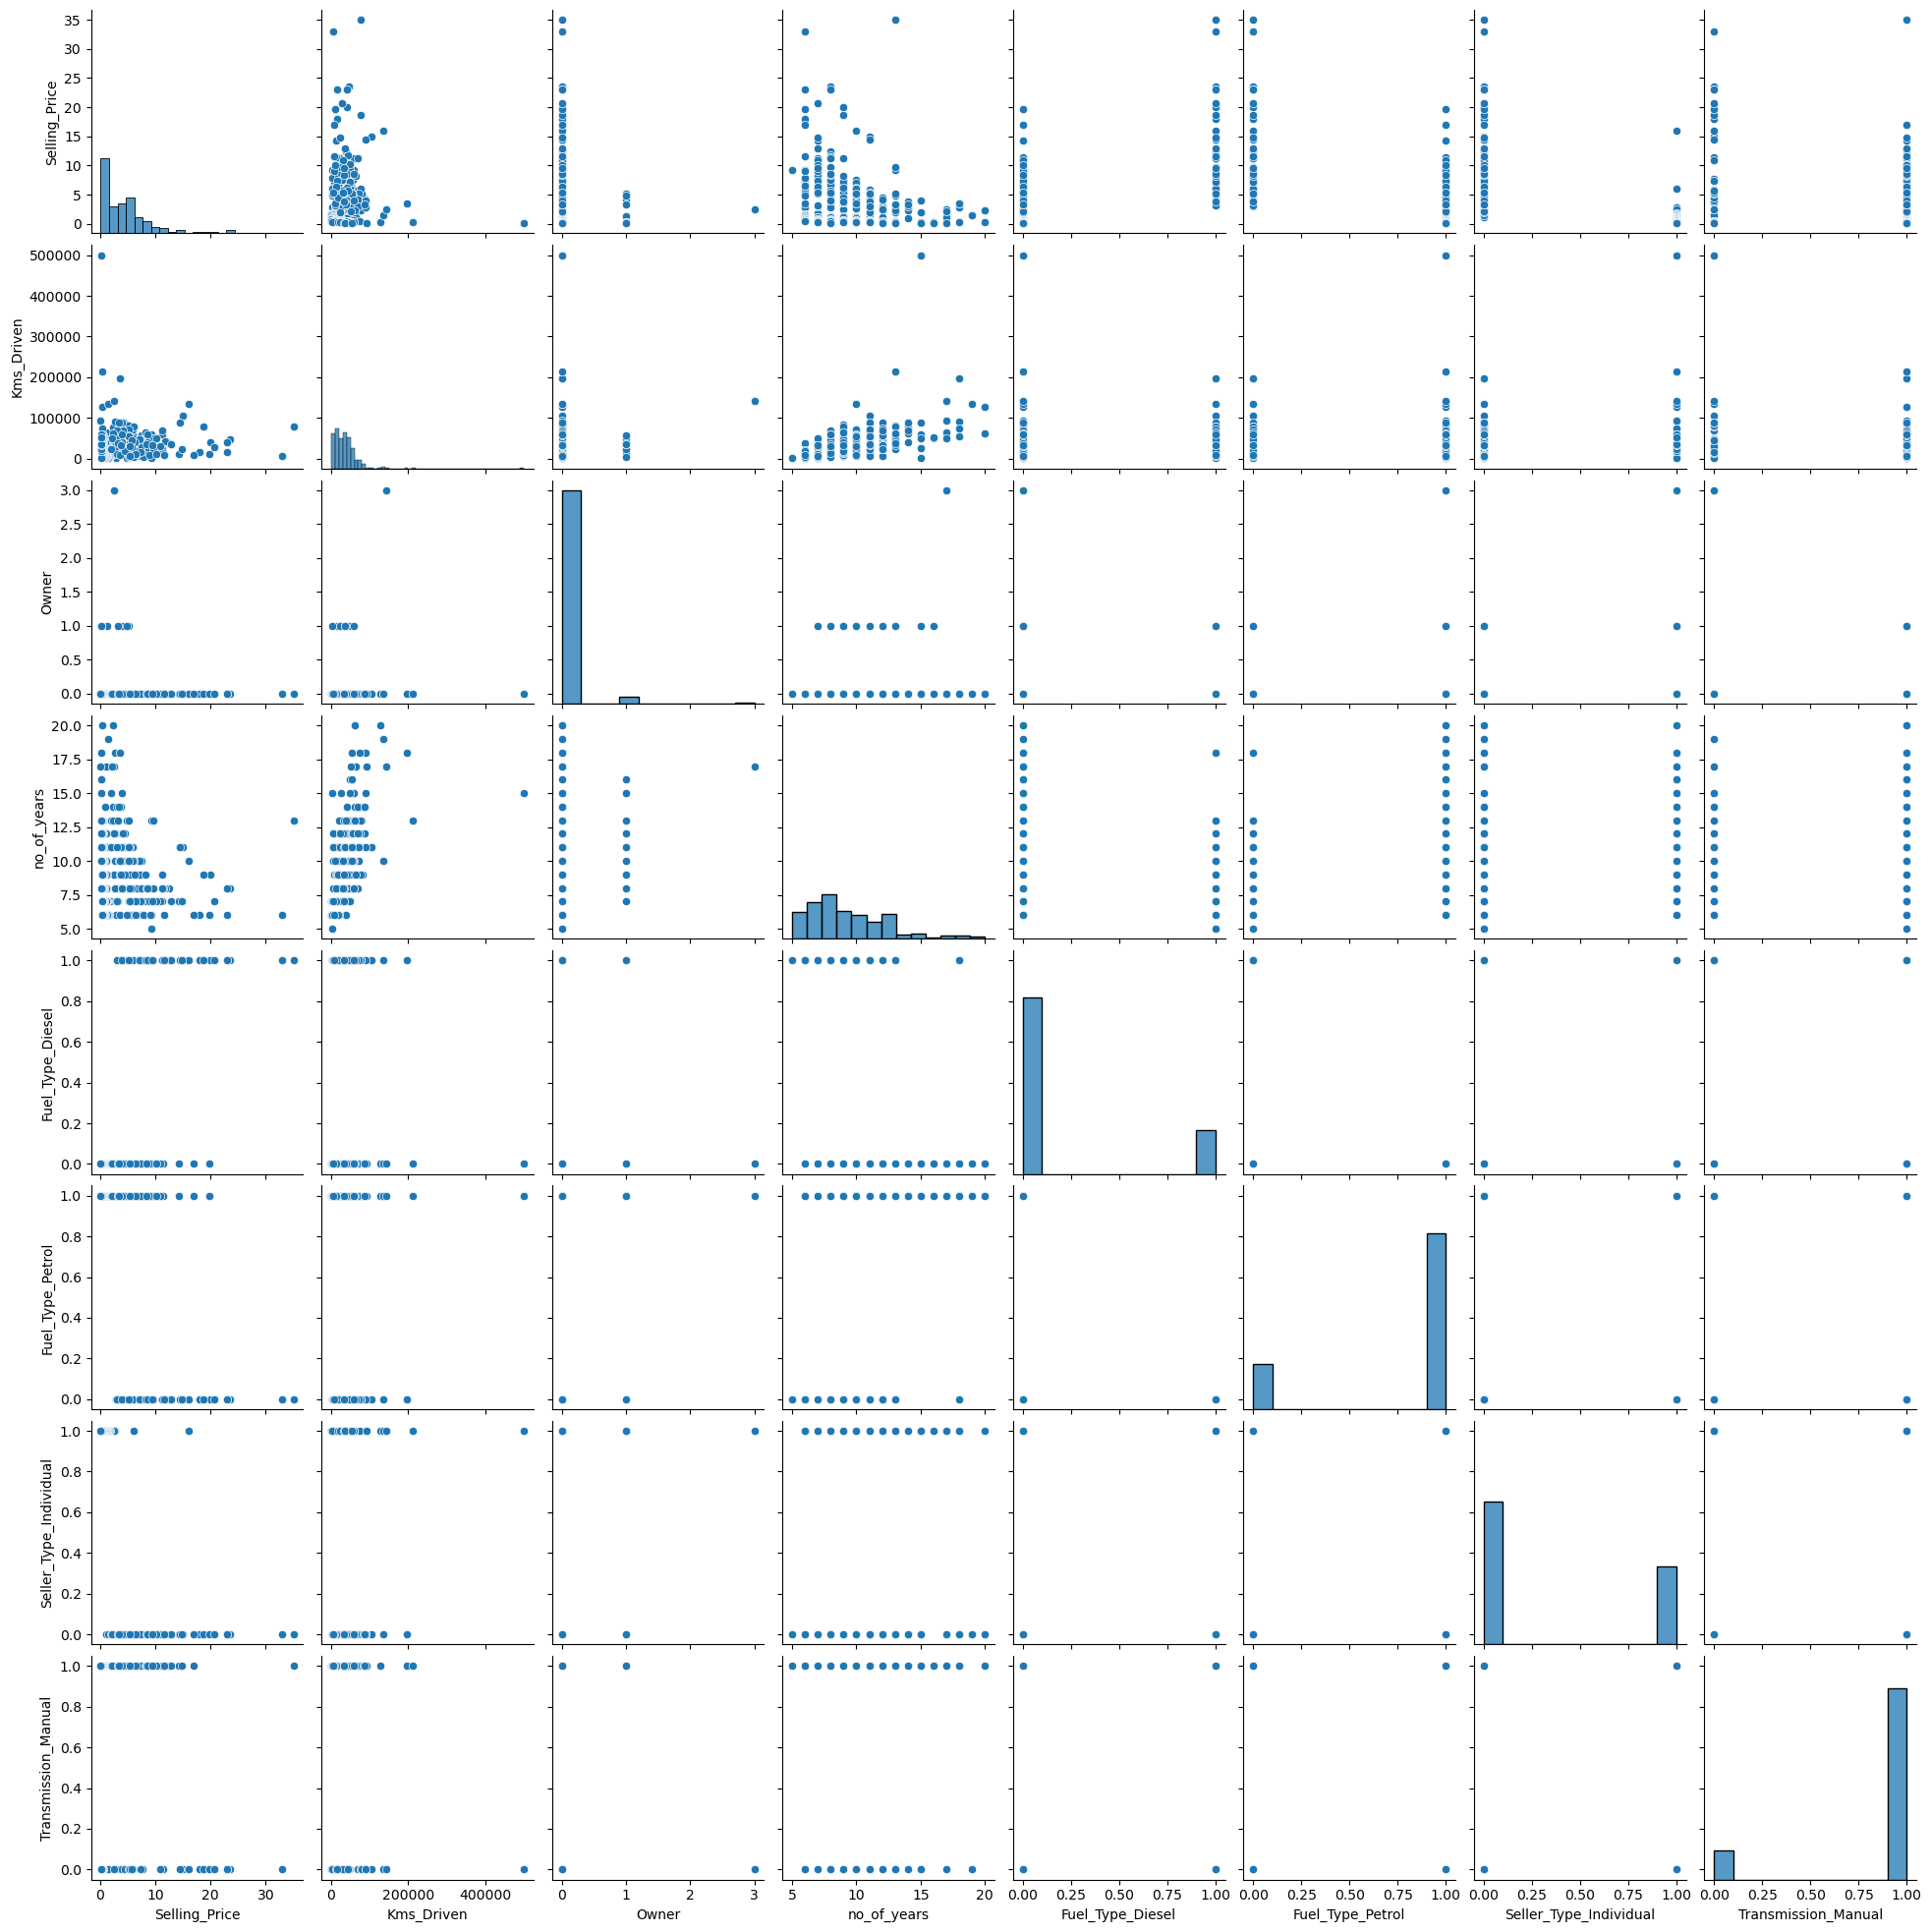

In [167]:
sns.pairplot(final_dataset)

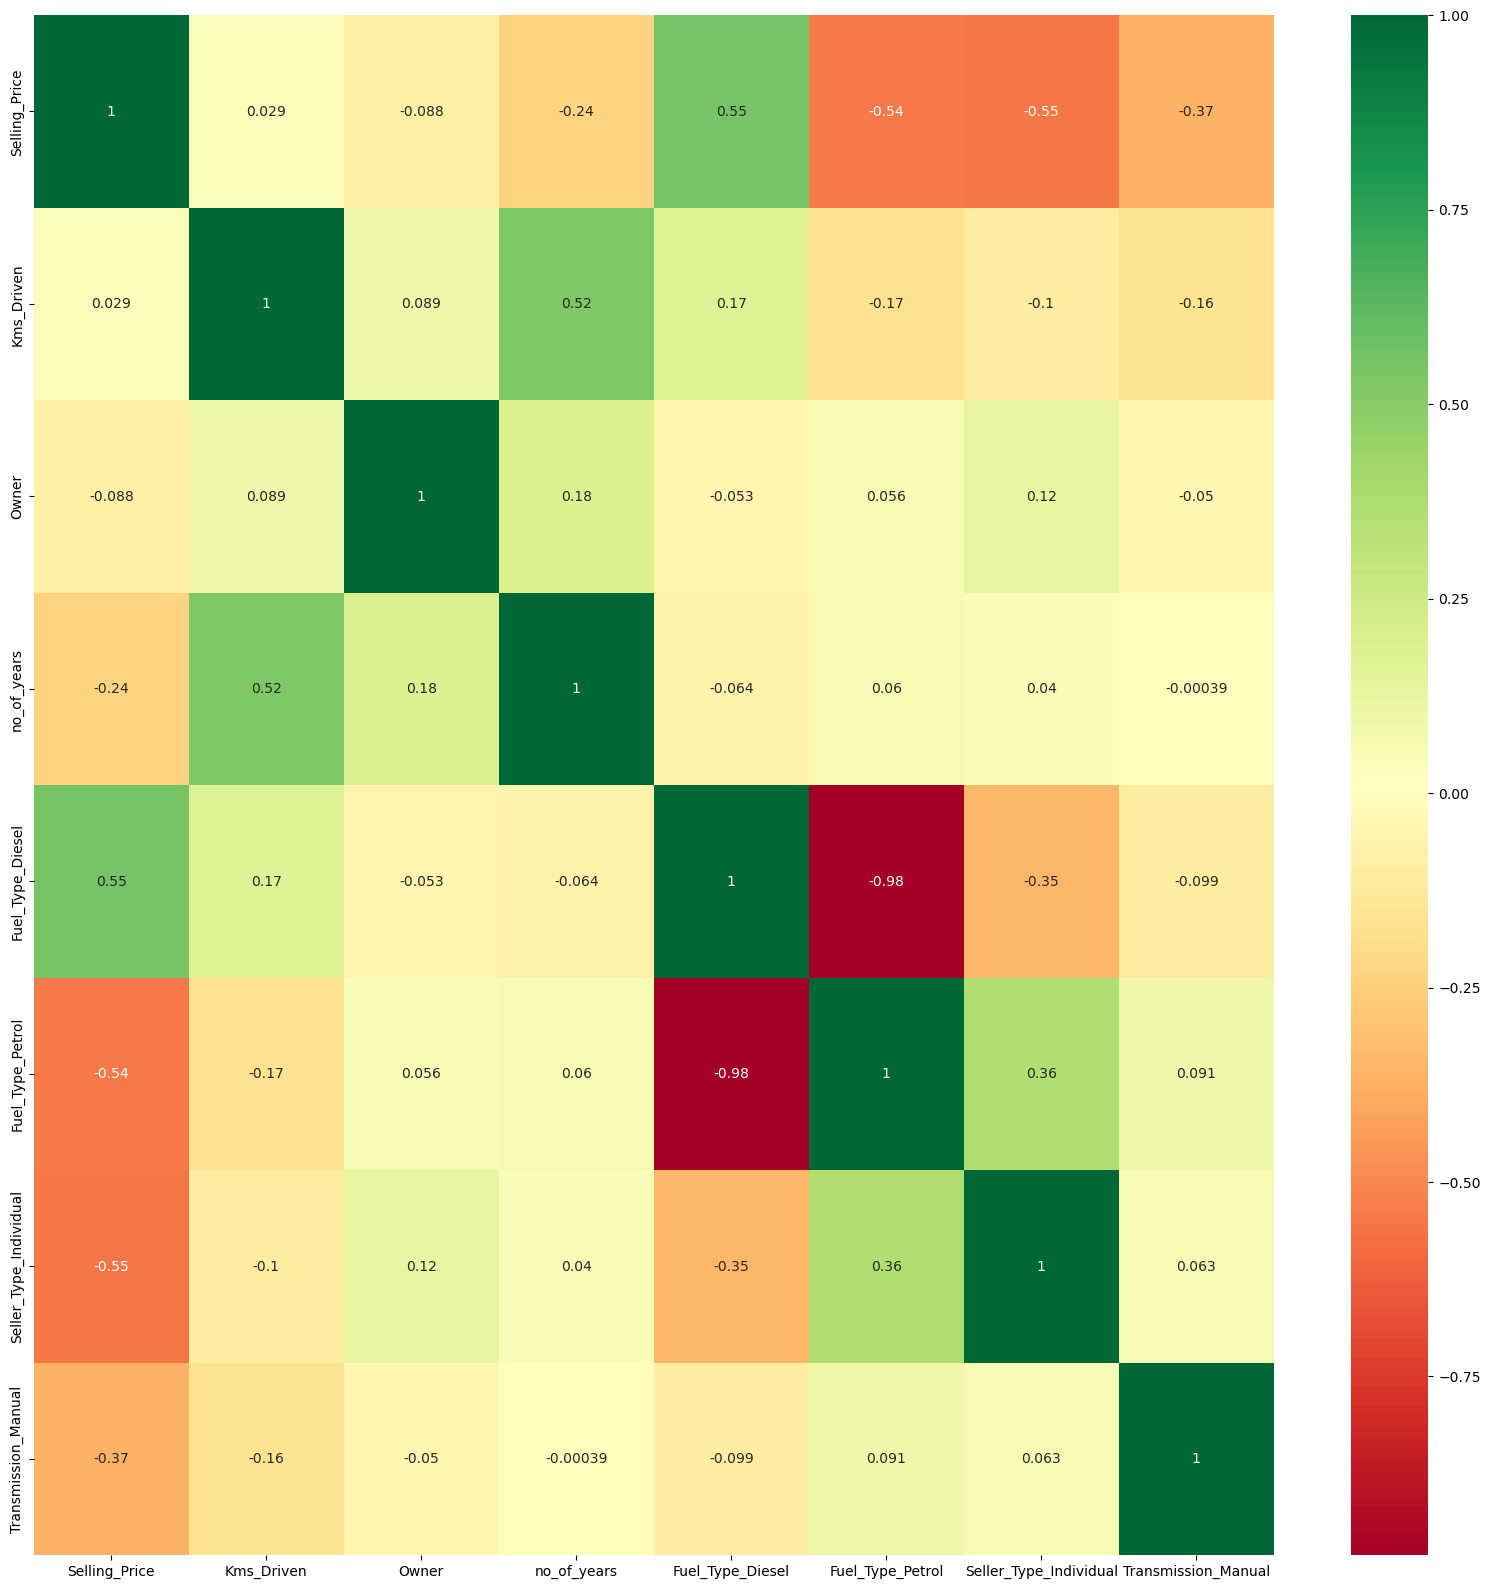

In [168]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [169]:
final_dataset.head()

,Selling_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,27000,0,9,0,1,0,1
1,4.75,43000,0,10,1,0,0,1
2,7.25,6900,0,6,0,1,0,1
3,2.85,5200,0,12,0,1,0,1
4,4.60,42450,0,9,1,0,0,1


In [170]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [171]:
X.head()

,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,27000,0,9,0,1,0,1
1,43000,0,10,1,0,0,1
2,6900,0,6,0,1,0,1
3,5200,0,12,0,1,0,1
4,42450,0,9,1,0,0,1


In [172]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [173]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.18832864 0.00499168 0.1210884  0.30692098 0.0007331  0.1558696
 0.2220676 ]


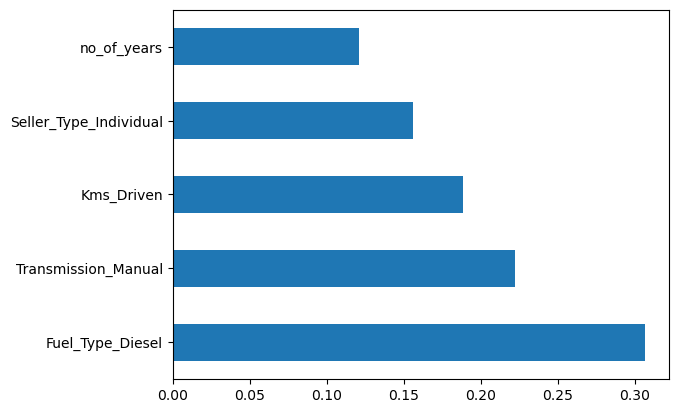

In [174]:
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [176]:
X_train.shape

(240, 7)

# Random Forest Regressor

In [177]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [178]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [179]:
from sklearn.model_selection import RandomizedSearchCV  #used for choosing best parameters

In [180]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [181]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': [1.0, 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [182]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [183]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [184]:
rf_random.best_score_

-11.040082102725567

In [185]:
predictions=rf_random.predict(X_test)

C:\Users\Garvit Batra\AppData\Local\Temp\ipykernel_22700\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<AxesSubplot: xlabel='Selling_Price', ylabel='Density'>

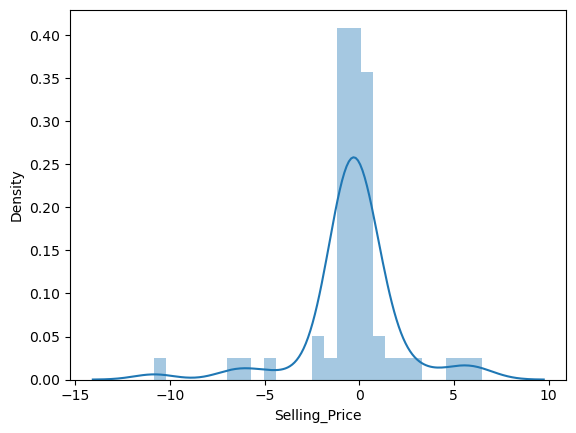

In [186]:
sns.distplot(y_test-predictions)

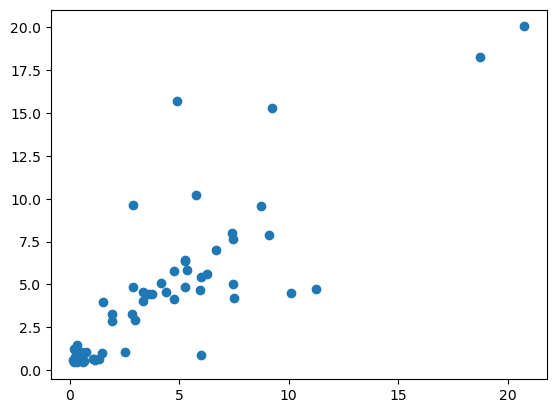

In [187]:
plt.scatter(y_test,predictions)

In [188]:
from sklearn import metrics

In [189]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.409847294431437
MSE: 6.068286413539412
RMSE: 2.4633892127594073


# Linear Regression

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

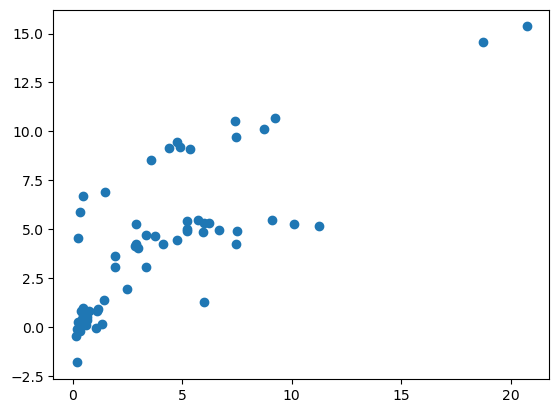

In [223]:
plt.scatter(y_test,y_pred)

In [224]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.8576762160323304
MSE: 7.012390514014387
RMSE: 2.6480918628352734


# K Nearest Neighbours

In [214]:
from sklearn.neighbors import KNeighborsRegressor

In [215]:
error = []
for k in range(1,20):
  clf = KNeighborsRegressor(k)
  clf_model = clf.fit(X_train,y_train)
  y_pred = clf_model.predict(X_test)
  error.append(metrics.r2_score(y_test, y_pred))

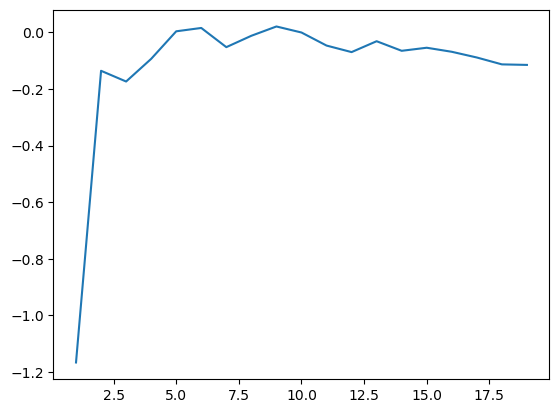

In [216]:
plt.plot(range(1, 20), error)

In [217]:
clf = KNeighborsRegressor(3)
clf_model = clf.fit(X_train,y_train)
y_pred = clf_model.predict(X_test)

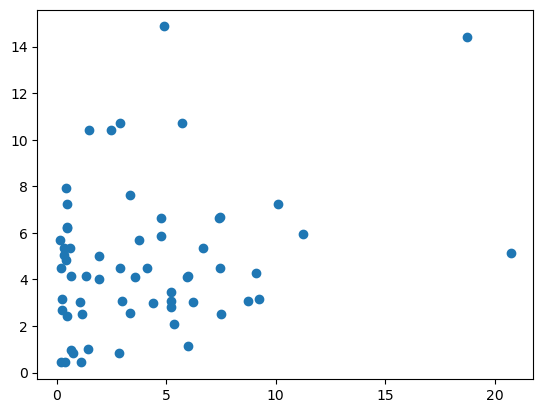

In [218]:
plt.scatter(y_test,y_pred)

In [219]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.4553551912568308
MSE: 20.010325136612018
RMSE: 4.4732901914152645


# Regression Analysis using SVM

In [208]:
from sklearn.svm import SVR

In [209]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [210]:
y_pred = regressor.predict(X_test)

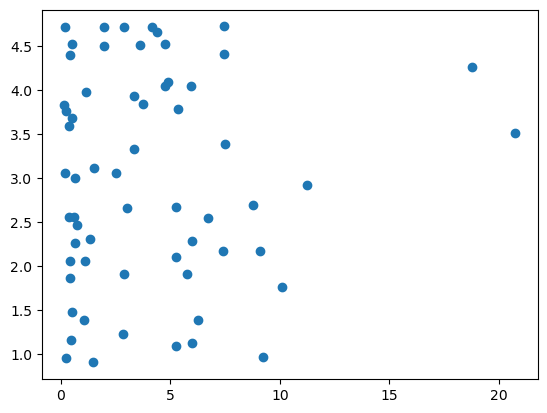

In [211]:
plt.scatter(y_test,y_pred)

In [213]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.0479197766283765
MSE: 19.087401265055842
RMSE: 4.368913053043725


In [228]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.1.
